## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score


## Adquirindo dados

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,cache=True)
mnist.target = mnist.target.astype(np.int8)#transforma labels em string para int

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [5]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
mnist.target.shape

(70000,)

In [8]:
x, y = mnist['data'],mnist['target']

In [9]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [10]:
digito = x[20000].reshape(28,28)

## Visulizando os dados

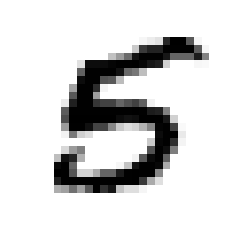

In [12]:
plt.imshow(digito,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [13]:
y[20000]

5

## Pre-processamento

In [11]:
x_train,y_train,x_test,y_test = x[:60000],y[:60000],x[60000:],y[60000:]

In [12]:
x_test.shape

(10000, 784)

In [13]:
x_train.shape

(60000, 784)

In [14]:
y_train.shape

(60000,)

In [15]:
index = np.random.permutation(60000)
x_train,y_train = x_train[index],y_train[index]

In [16]:
index = np.random.permutation(10000)
x_test, y_test = x_test[index],y_test[index]

## Treinando o modelo

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kng = KNeighborsClassifier()
kng.fit(x_train,y_train)
prediction = kng.predict(x_test)
print('Acurracia:',accuracy_score(y_test,prediction))

## Ajustando o modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {
    'n_neighbors' : [1,3,5],
    'weights' : ['uniform', 'distance'],
    'n_jobs' : [-1],
}

In [56]:
kng = KNeighborsClassifier()


In [57]:
grid_search = GridSearchCV(kng,param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_jobs': [-1], 'n_neighbors': [5, 10, 20, 30, 40, 50],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [58]:
grid_search.best_params_

{'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}

In [66]:
kng = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=3, p=2,
                                            weights='distance')
kng.fit(x_train,y_train)
prediction = kng.predict(x_test)
print("Acuracia:",accuracy_score(prediction,y_test))


Acurracia: 0.9717


## Deslocando pixels das imagens

In [17]:

def desloc_pix(x):
    cima = []
    baixo = []
    for i in range(len(x)):
        cima.append(np.roll(x[i], -1, axis=0))
        baixo.append(np.roll(x[i], 1, axis=0))
    
    cima = np.asarray(cima,np.float64)
    baixo = np.asarray(baixo,np.float64)
    esquerda = np.roll(x, -1, axis=1)
    direita = np.roll(x, 1, axis=1)
    
    final = np.concatenate([x,cima,baixo,esquerda,direita])
    
    
       
    
    
    return final
x_train2 = desloc_pix(x_train)
y_train2 = np.concatenate([y_train,y_train,y_train,y_train,y_train])

In [70]:
print(x_train2.shape)
print(y_train2.shape)

(300000, 784)
(300000,)


In [71]:
index = np.random.permutation(300000)
x_train2,y_train2 = x_train2[index],y_train2[index]

## KNN

In [39]:
kng = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=3, p=2,
                                            weights='distance')
kng.fit(x_train2,y_train2)
prediction = kng.predict(x_test)



In [32]:
print("Acuracia:",accuracy_score(prediction,y_test))
print("Precisão:",precision_score(prediction,y_test,average='weighted'))
print("Revocação:",recall_score(prediction,y_test,average='weighted'))
print("F1_score:",f1_score(prediction,y_test,average='weighted'))

Acuracia: 0.5872
Precisão: 0.6739040424615941
Revocação: 0.5872
F1_score: 0.5941271638511452


## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 30, n_estimators= 300, n_jobs= -1)
rf.fit(x_train2,y_train2)
prediction = rf.predict(x_test)

In [73]:
print("Acuracia:",accuracy_score(prediction,y_test))
print("Precisão:",precision_score(prediction,y_test,average='weighted'))
print("Revocação:",recall_score(prediction,y_test,average='weighted'))
print("F1_score:",f1_score(prediction,y_test,average='weighted'))

Acuracia: 0.9758
Precisão: 0.9758587375323914
Revocação: 0.9758
F1_score: 0.9758100083229949
